# Time and preferences (about task type and data form presentation)
### Is there a statistically significant difference in response time depending on the response to questions about the preferred type of graphics and graphic form, as well as changes in opinion in these questions before and after the study?

In [1]:
import pandas as pd

from functions.set_preparations import prepare_set_changes_questions
from functions.tests.independent_groups.two_groups import ttest_or_mannwhitney_test
from functions.tests.independent_groups.more_than_two_groups import anova_or_kruskalwallis_test
from functions.plots import plot_multi_boxplot, plot_multi_density

In [2]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', 'Quest1_before', 'Quest2_before']
)
df_answers = df_answers[df_answers.ID != 6] 

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv', usecols=['ID', 'Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b'])

df_quest = pd.read_csv('/Users/martasolarz/Studies/Thesis/data/survey.csv', usecols=['ID', 'Quest1_after', 'Quest2_after'])

df_merge = df_answers.merge(df_quest, on='ID')
df_merge = df_merge.merge(df_time, on='ID')
df_merge = df_merge[df_merge.ID != 6] 
df_merge.head()

,ID,Quest1_before,Quest2_before,Quest1_after,Quest2_after,Duration_1a,Duration_1b,Duration_2a,Duration_2b,Duration_3a,Duration_3b
0,1,B,wykres,B,wykres,28.015,15.516,54.481,58.697,56.314,63.897
1,2,B,wykres,B,wykres,66.230,88.463,42.248,85.329,47.948,129.427
2,3,B,mapa,B,mapa,68.830,83.963,45.165,32.732,8.000,61.197
3,4,B,mapa,B,wykres,46.048,78.446,12.449,37.715,60.980,101.795
4,5,B,tabela,B,tabela,67.980,27.582,55.931,22.132,34.898,62.930


Each graphic separately: 1a, 1b, 2a, 2b, 3a, 3b

In [3]:
df1a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_1a']].rename(columns={'Duration_1a':'time'})
df2a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_2a']].rename(columns={'Duration_2a':'time'})
df3a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_3a']].rename(columns={'Duration_3a':'time'})

df1b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_1b']].rename(columns={'Duration_1b':'time'})
df2b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_2b']].rename(columns={'Duration_2b':'time'})
df3b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_3b']].rename(columns={'Duration_3b':'time'})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

##### H0: There is no statistically significant difference in response time depending on the response to questions about the preferred type of graphics and graphic form.

##### H1: There is a statistically significant difference in response time depending on the response to questions about the preferred type of graphics and graphic form.

##### Significance level: $\alpha=0.05$

Note:
- Quest1 - question about the preferred type of graphics (with or without redundancy)
- Quest2 - question about the preferred form of graphics (map, table, chart or text)
- before - before the study
- after - after the study

In [4]:
ALPHA = 0.05

In [5]:
# Question 1
for nr, df in enumerate(dfs):
    print('#############################################')
    print(names[nr+1])
    for i in ['Quest1_before', 'Quest1_after']:
        print('----------------')
        print(i)
        ttest_or_mannwhitney_test(df, 'time', i, ALPHA, 'A', 'B')

#############################################
1a:
----------------
Quest1_before
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 62.0
p-value: 0.6795929532771638
No reason to reject H0, accept H0.
----------------
Quest1_after
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 141.0
p-value: 0.5855986955142409
No reason to reject H0, accept H0.
#############################################
1b:
----------------
Quest1_before
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 44.0
p-value: 0.22459787722945618
No reason to reject H0, accept H0.
----------------
Quest1_after
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 173.0
p-value: 0.6937481238934825
No reason to reject H0, accept H0.
#############################################
2a:
----------------
Quest1_before
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 29.0
p-value: 0.0

In [6]:
# Question 2
for nr, df in enumerate(dfs):
    print('#############################################')
    print(names[nr+1])
    for i in ['Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        anova_or_kruskalwallis_test(df, 'time', i, alpha=ALPHA)

---------------------------------------------
1a:
----------------
Quest2_before
Conducting normality test...
Conducting homogeneity variance test...
Kruskal-Wallis test conducted...
H: 2.775609756097566
p-value: 0.42753073954113074
No reason to reject H0, accept H0.
----------------
Quest2_after
Data have not at least length 3...
Kruskal-Wallis test conducted...
H: 0.2657723577235771
p-value: 0.9663317587823116
No reason to reject H0, accept H0.
---------------------------------------------
1b:
----------------
Quest2_before
Conducting normality test...
Kruskal-Wallis test conducted...
H: 3.775609756097566
p-value: 0.28673590011968875
No reason to reject H0, accept H0.
----------------
Quest2_after
Data have not at least length 3...
Kruskal-Wallis test conducted...
H: 3.3645528455284506
p-value: 0.3387586728647392
No reason to reject H0, accept H0.
---------------------------------------------
2a:
----------------
Quest2_before
Conducting normality test...
Kruskal-Wallis test conducte

### Summary:
There is a statistically significant difference in response time depending on the response to the question about the preferred graphic form at the level of significance $\alpha=0.05$ for:
- 2b (quest1_before)
- 3a (quest1_after, quest2_before)


### Plots - questions: before and after 

-------------------------------------
1a:


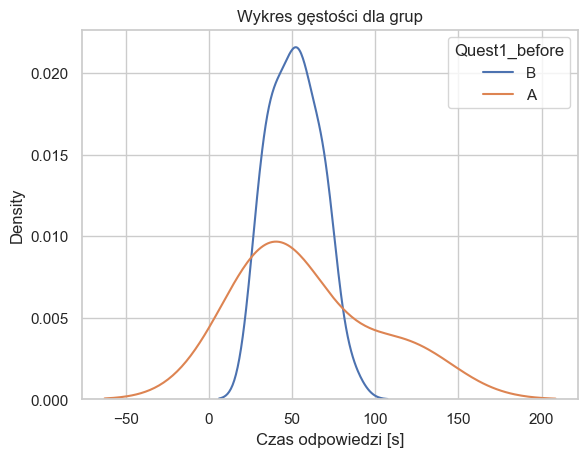

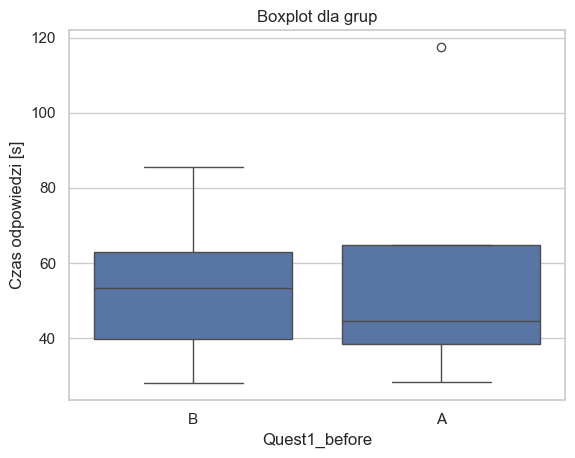

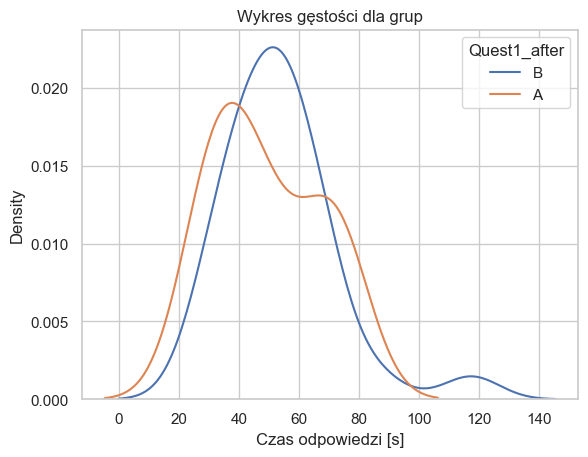

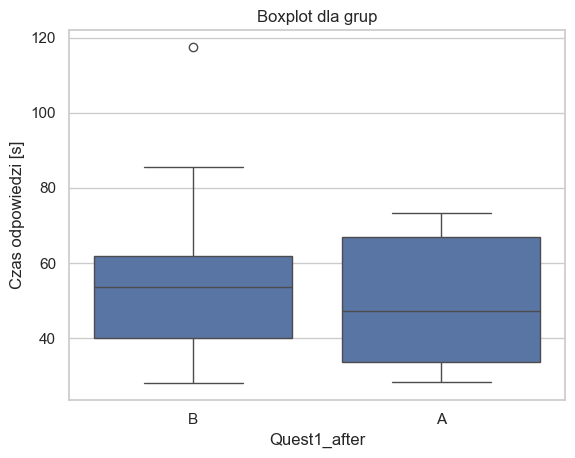

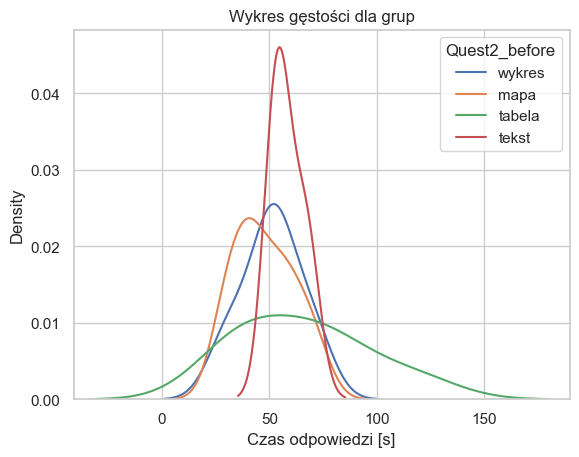

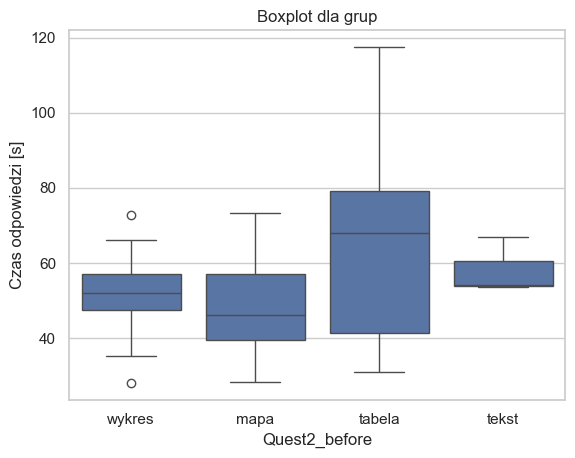

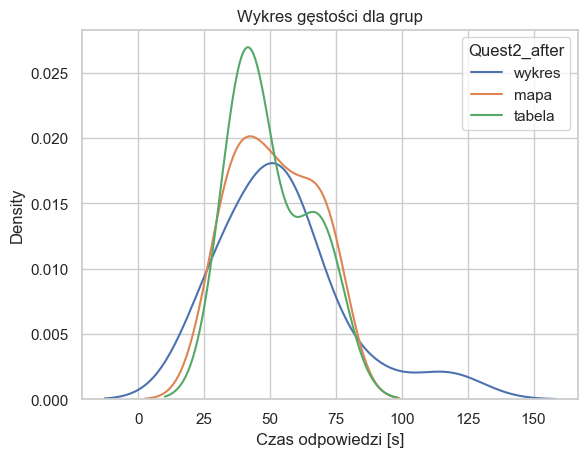

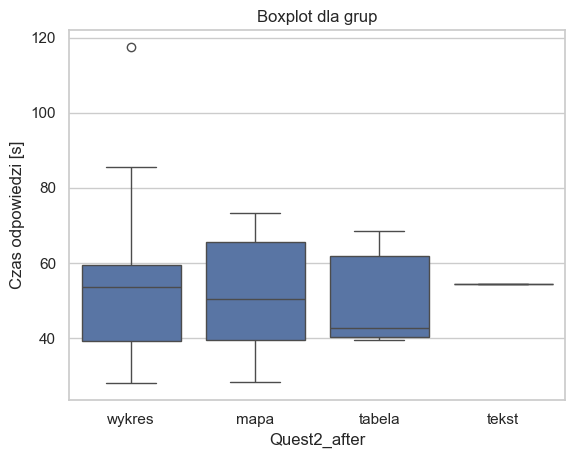

-------------------------------------
1b:


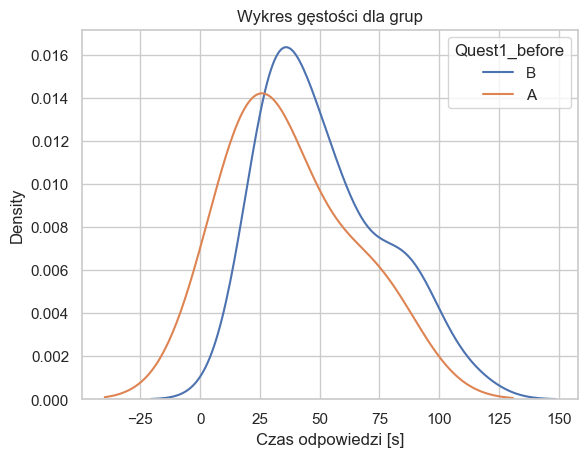

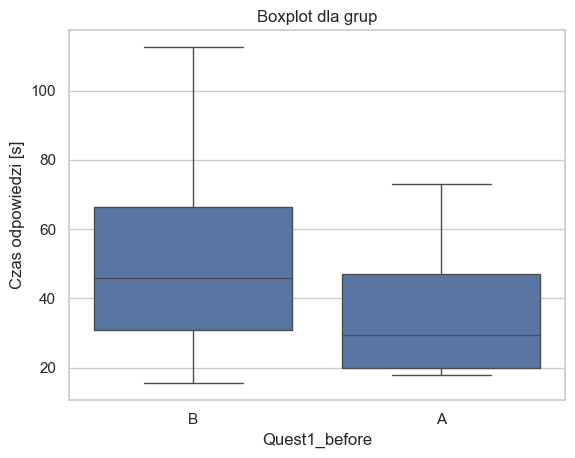

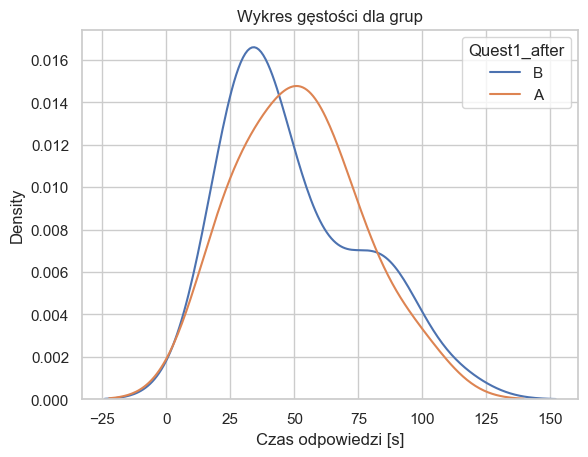

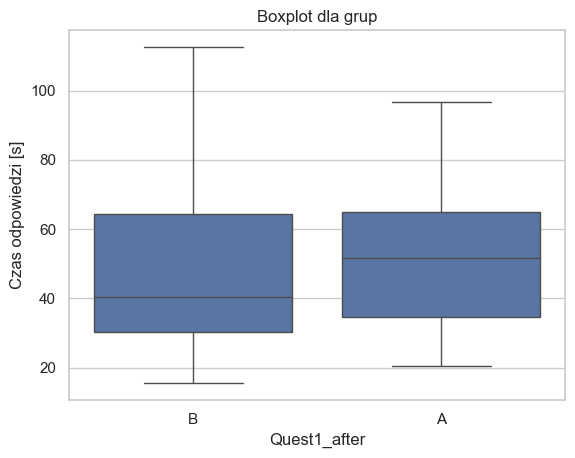

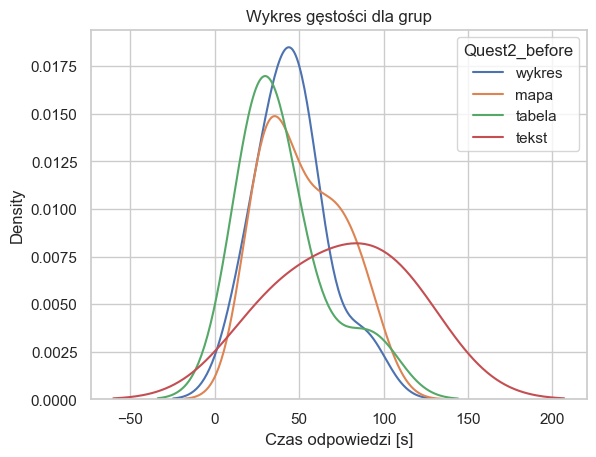

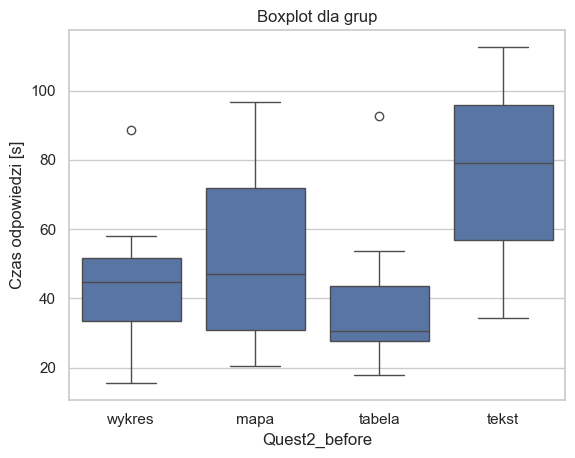

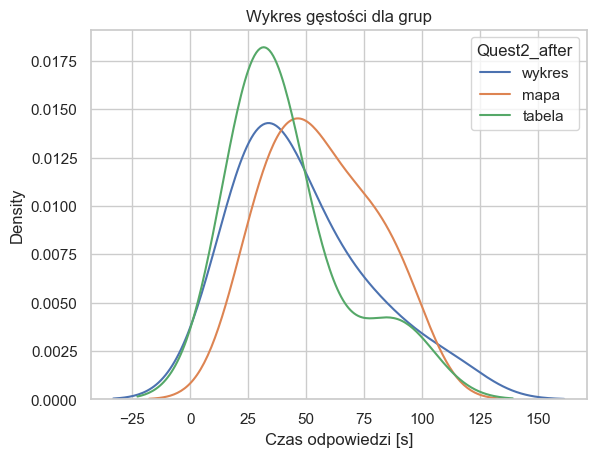

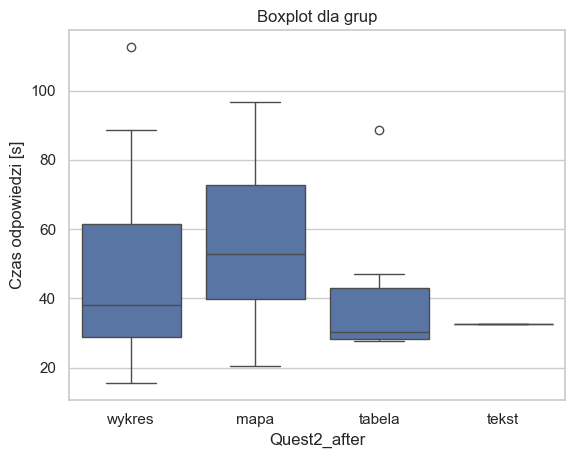

-------------------------------------
2a:


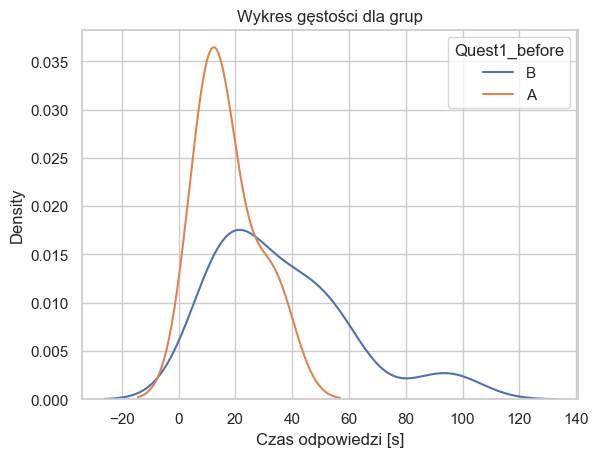

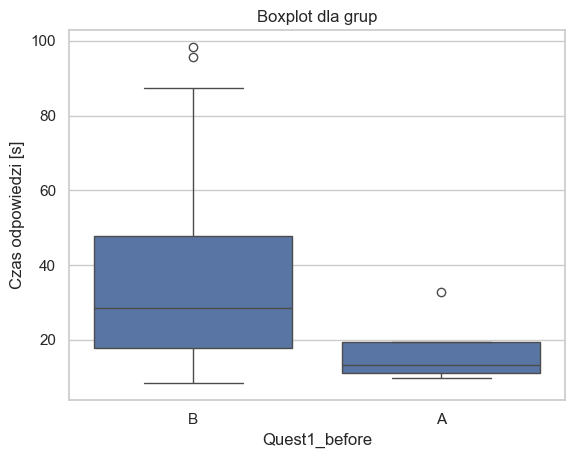

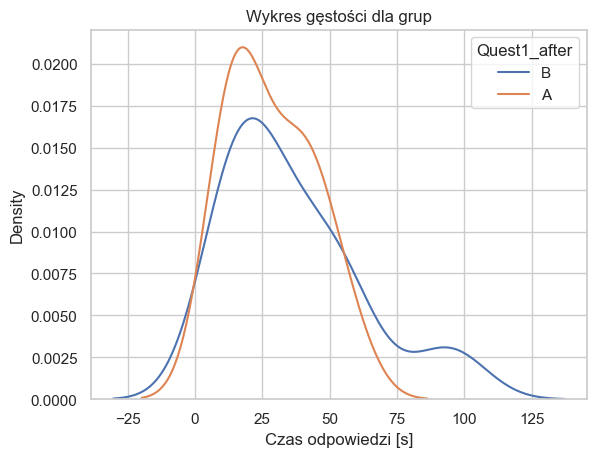

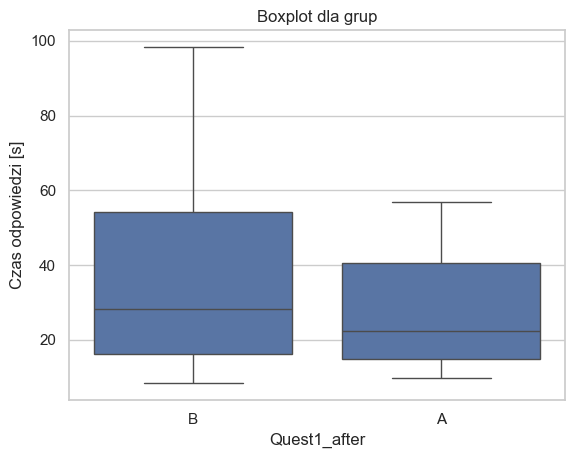

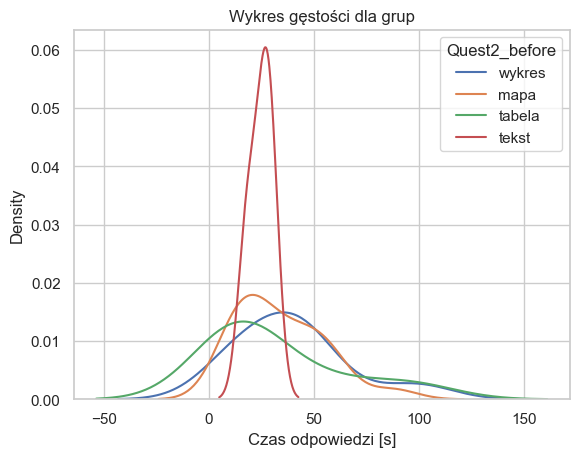

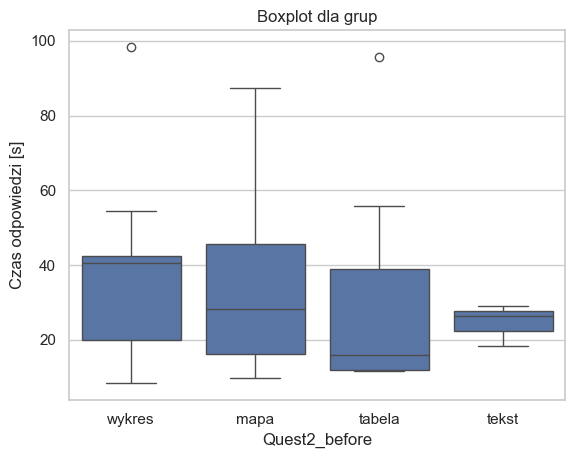

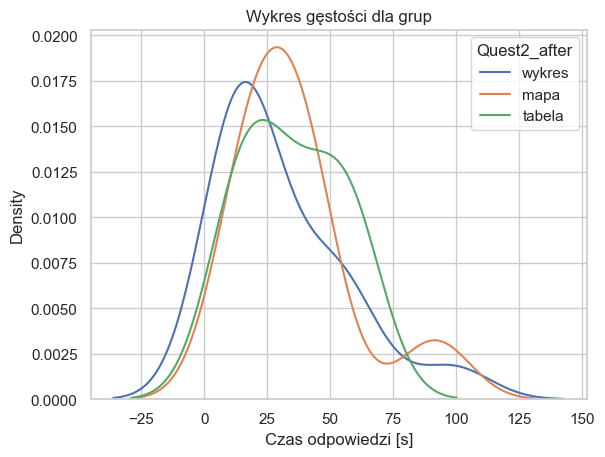

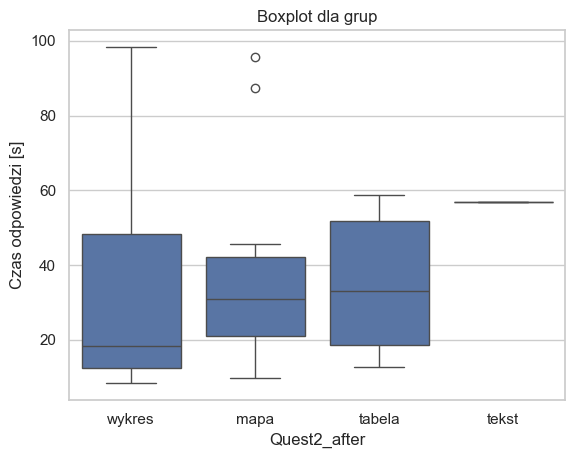

-------------------------------------
2b:


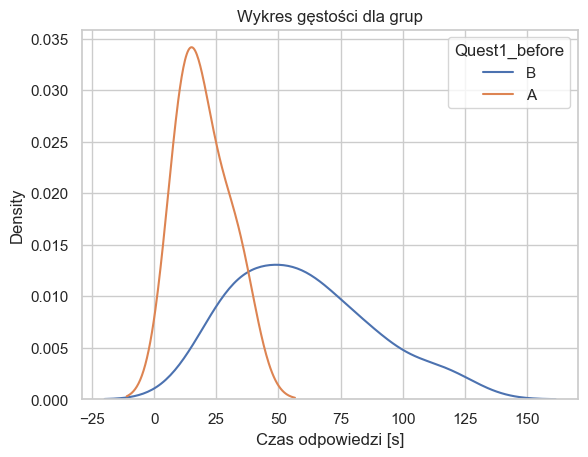

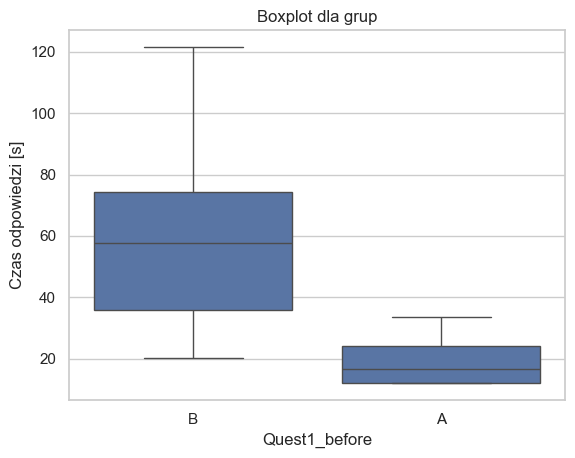

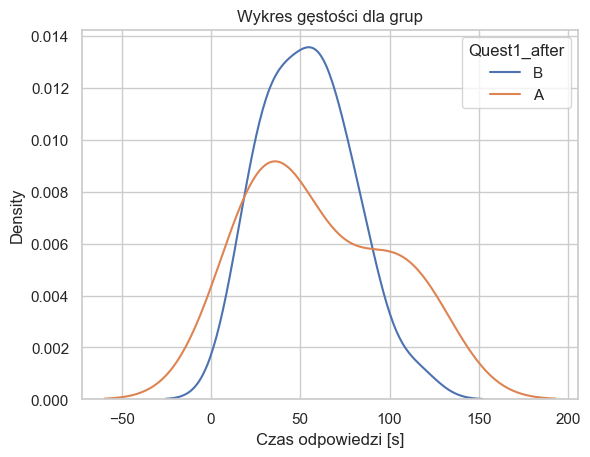

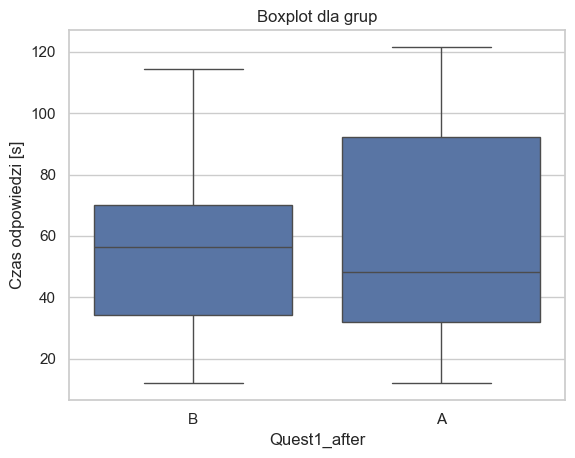

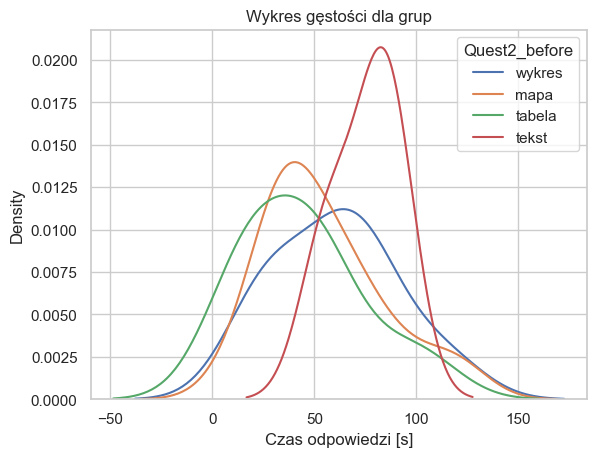

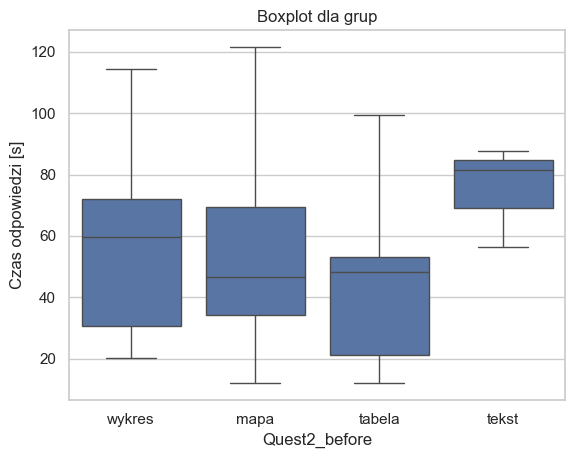

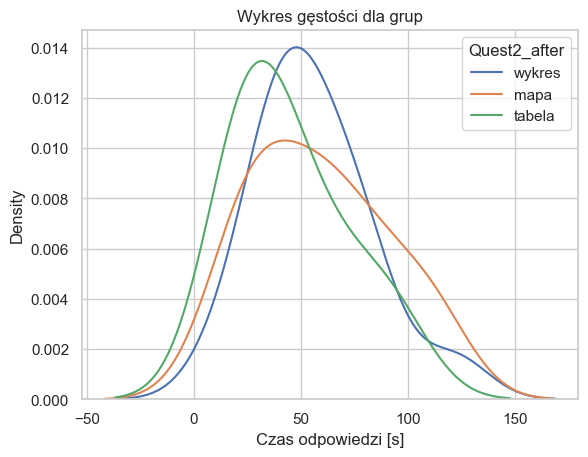

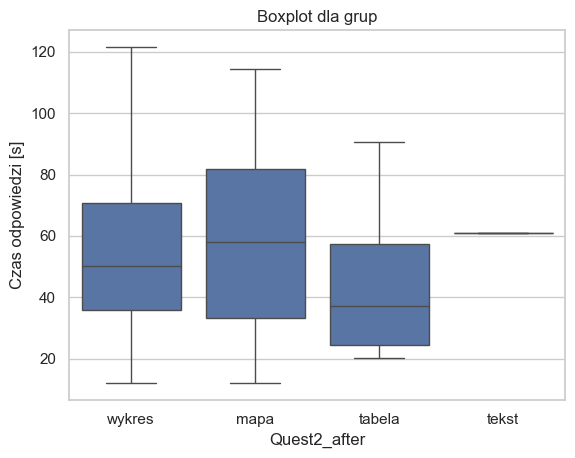

-------------------------------------
3a:


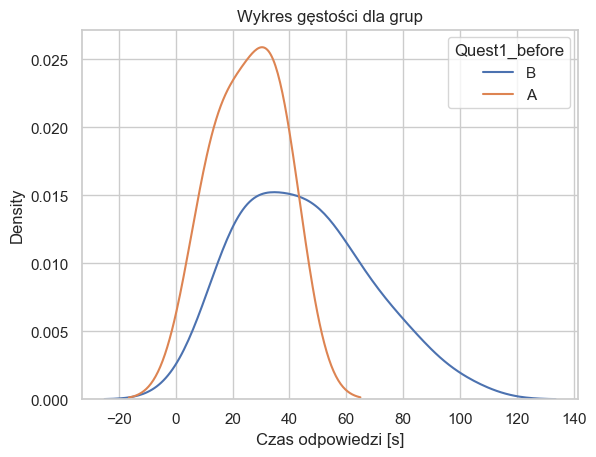

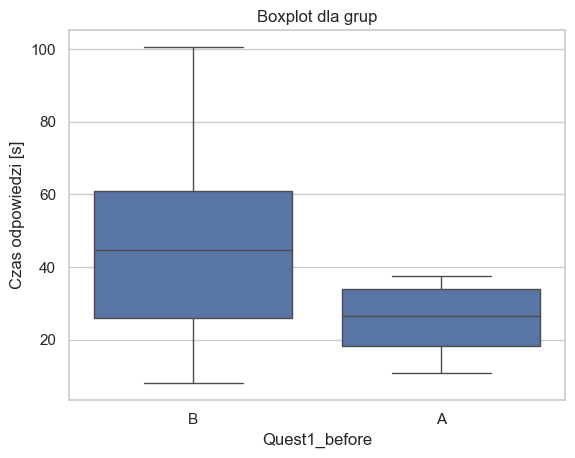

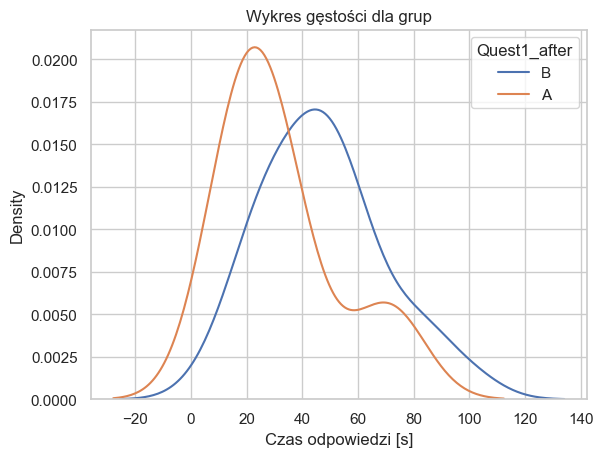

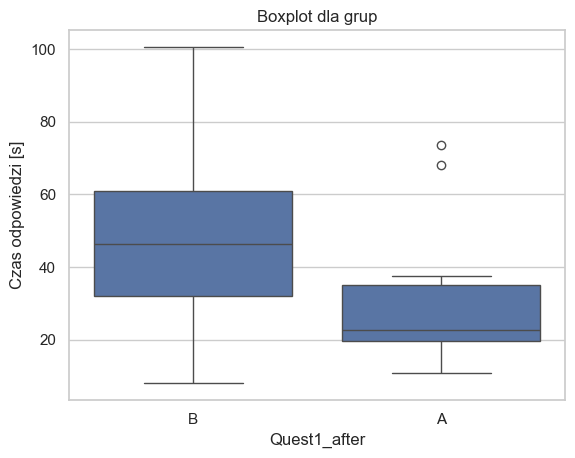

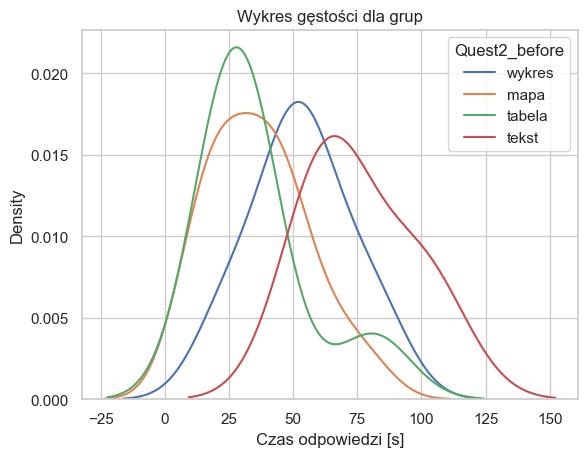

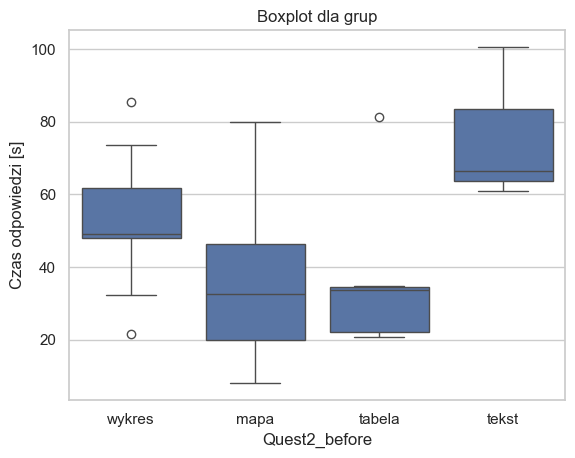

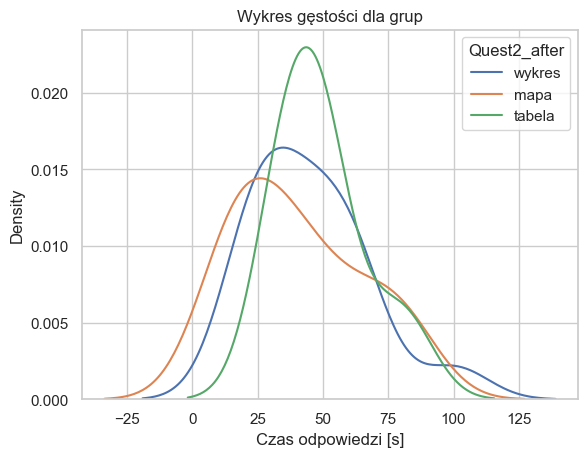

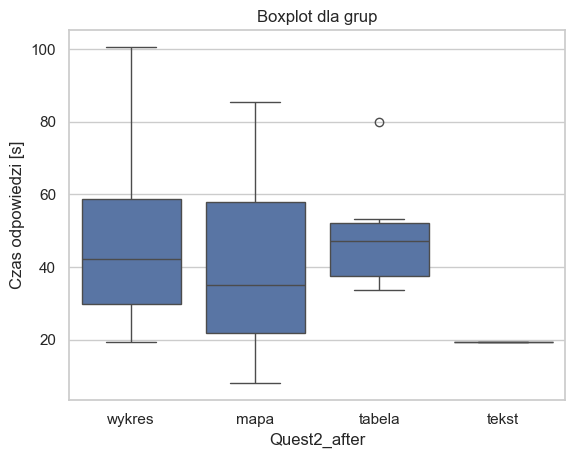

-------------------------------------
3b:


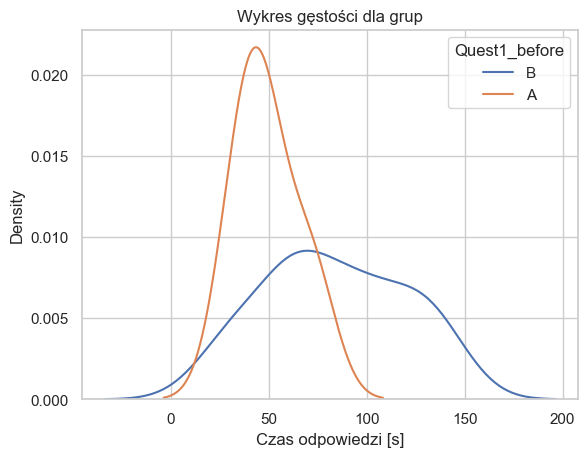

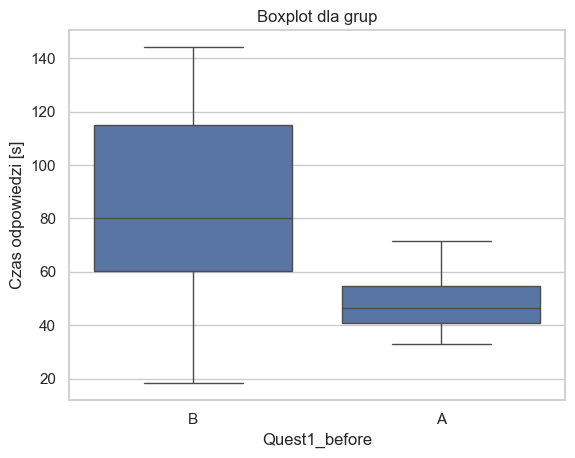

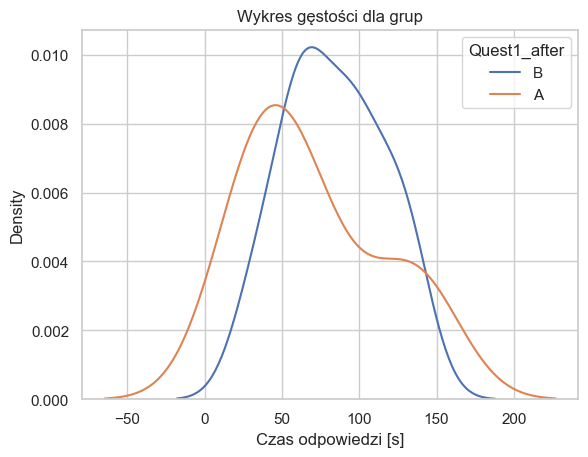

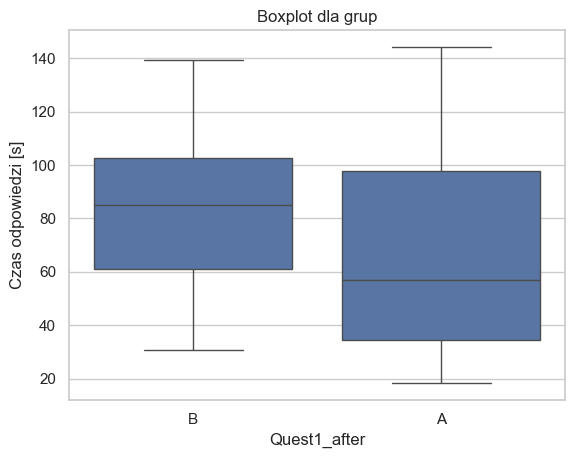

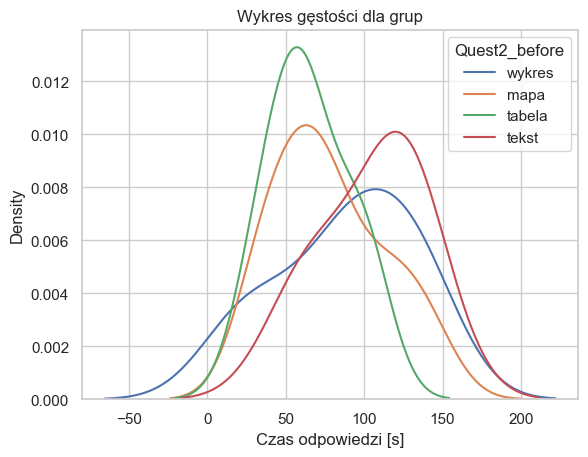

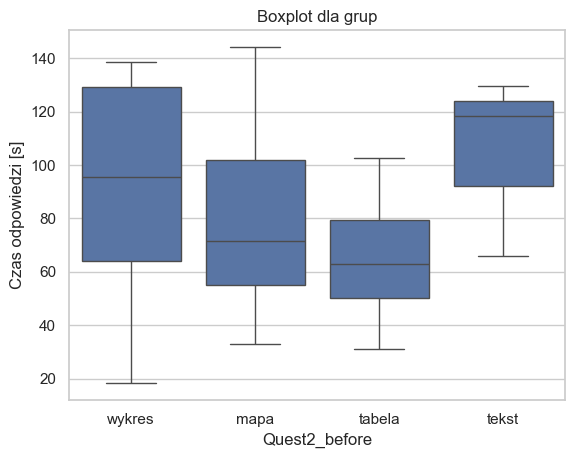

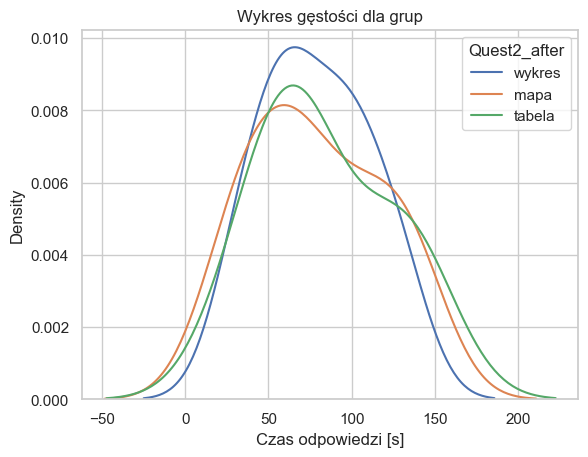

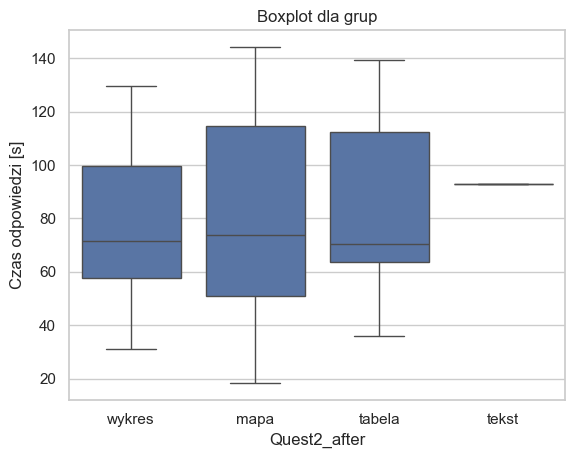

In [7]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    for quest in ['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after']:
        plot_multi_density(df, 'time', quest, 'Czas odpowiedzi [s]', quest)
        plot_multi_boxplot(df, quest, 'time', quest, 'Czas odpowiedzi [s]')

### Analysis - people who changed their minds vs people who remained with their opinion

##### H0: There is no statistically significant relationship between response time and changing opinion in question 1/2.

##### H1: There is a statistically significant relationship between response time and changing opinion in question 1/2.

##### Significance level: $\alpha=0.05$

Note:
- is_change_1 - True if the answer to the question about the preferred type of graphics has changed
- is_change_2 - True if the answer to the question about the preferred form of graphics has changed


In [8]:
df_merge['is_change_1'] = df_merge.apply(lambda row: row['Quest1_before'] != row['Quest1_after'], axis=1)
df_merge['is_change_2'] = df_merge.apply(lambda row: row['Quest2_before'] != row['Quest2_after'], axis=1)

In [9]:
col = 'time'
c = 'Duration'
label_col = 'Czas odopowiedzi [s]'
label_quest = 'Zmiana zdania'

1a:
----------------
quest1
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 170.0
p-value: 0.3312157998407794
No reason to reject H0, accept H0.


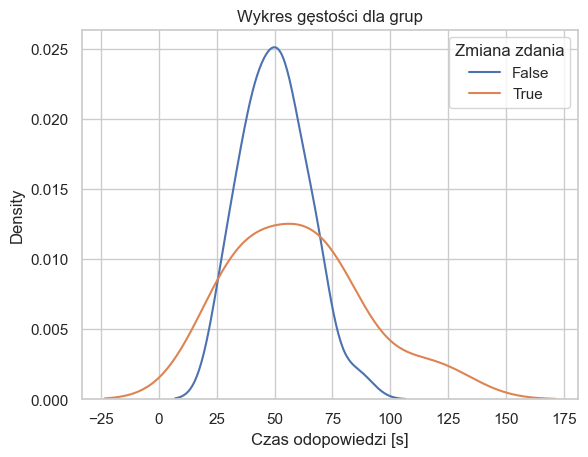

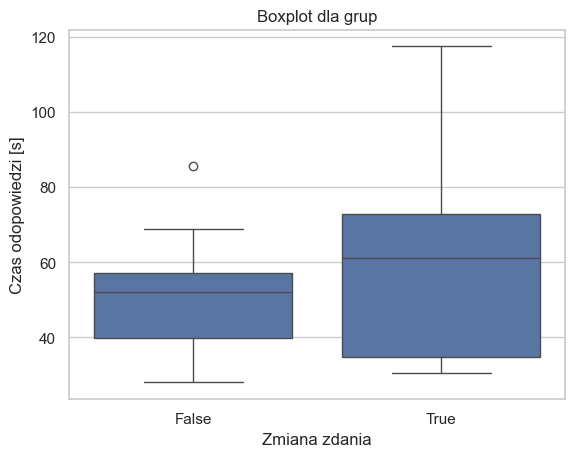

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 204.0
p-value: 0.7508713425135908
No reason to reject H0, accept H0.


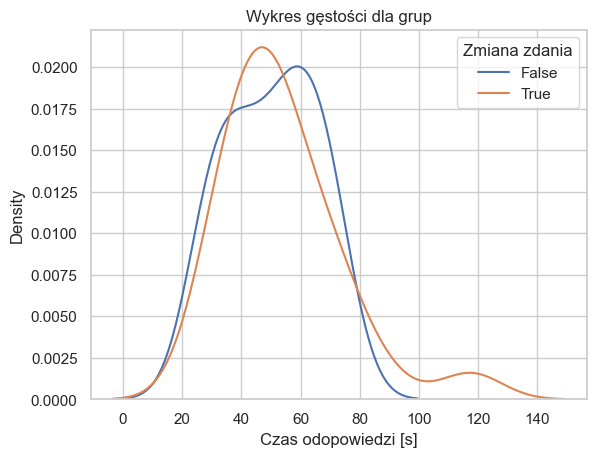

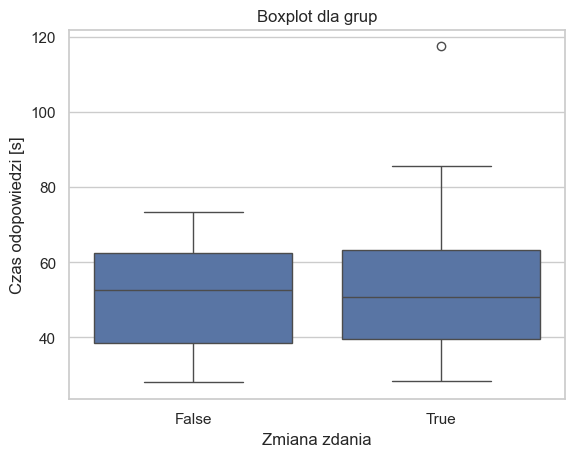

In [10]:
print('1a:')
df = prepare_set_changes_questions([df_merge[f'{c}_1a']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

1b:
----------------
quest1
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 144.0
p-value: 0.8969179400709345
No reason to reject H0, accept H0.


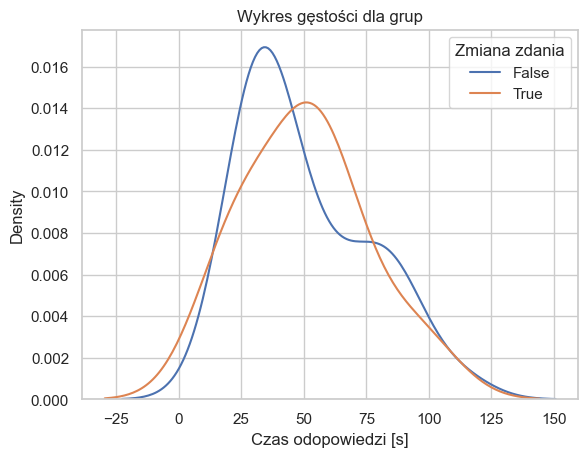

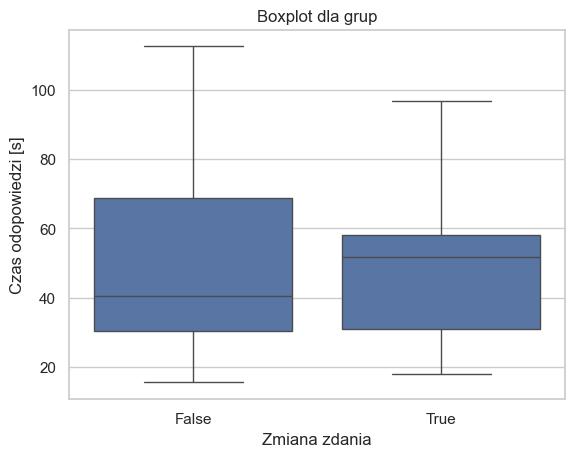

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 179.0
p-value: 0.7300203068185185
No reason to reject H0, accept H0.


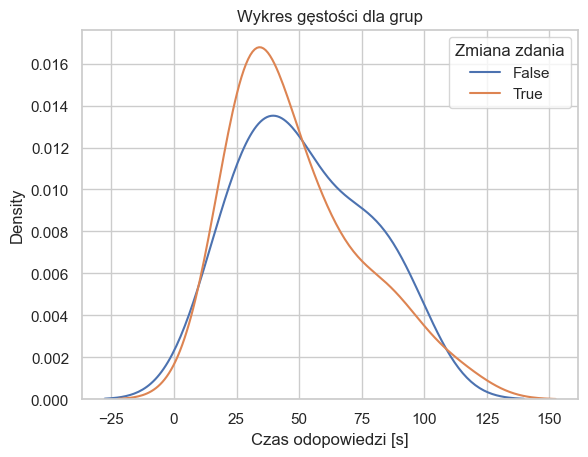

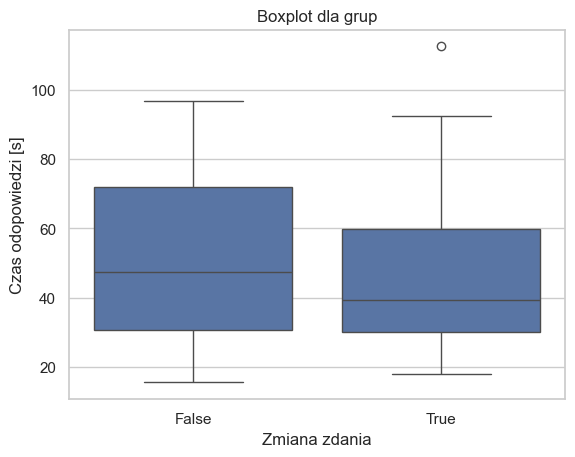

In [11]:
print('1b:')
df = prepare_set_changes_questions([df_merge[f'{c}_1b']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

2a:
----------------
quest1
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 124.0
p-value: 0.6270849076141936
No reason to reject H0, accept H0.


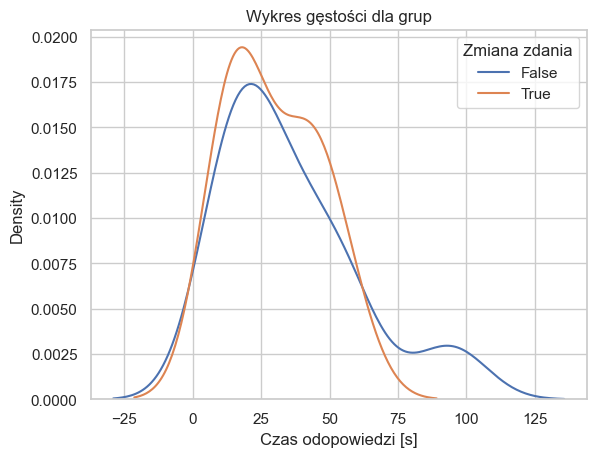

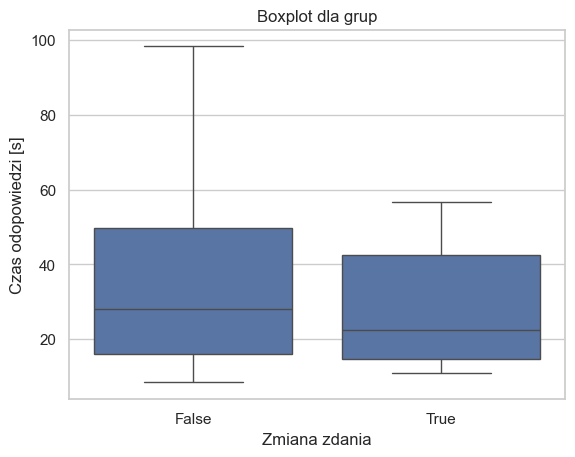

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 168.0
p-value: 0.5164772148074285
No reason to reject H0, accept H0.


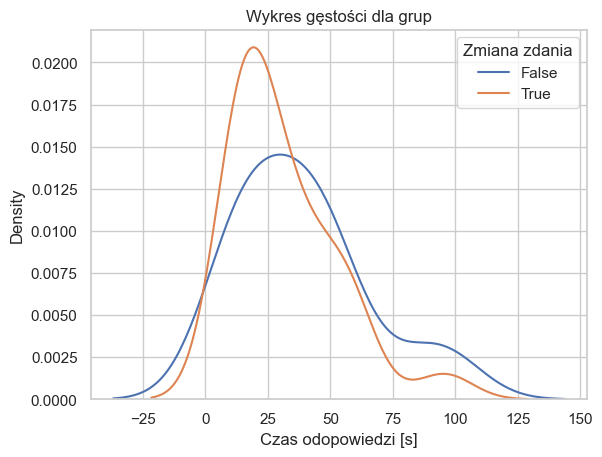

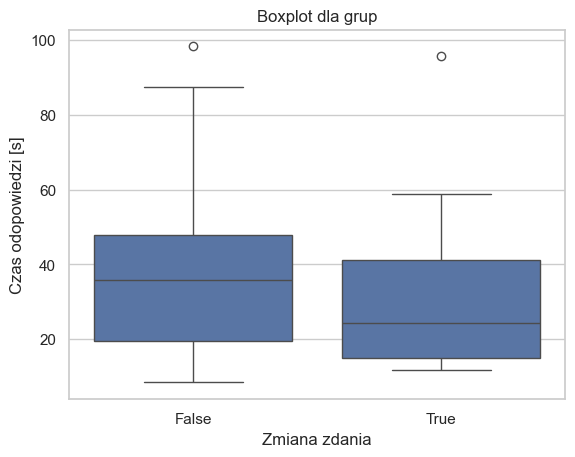

In [12]:
print('2a:')
df = prepare_set_changes_questions([df_merge[f'{c}_2a']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

2b:
----------------
quest1
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 169.0
p-value: 0.34758754174785444
No reason to reject H0, accept H0.


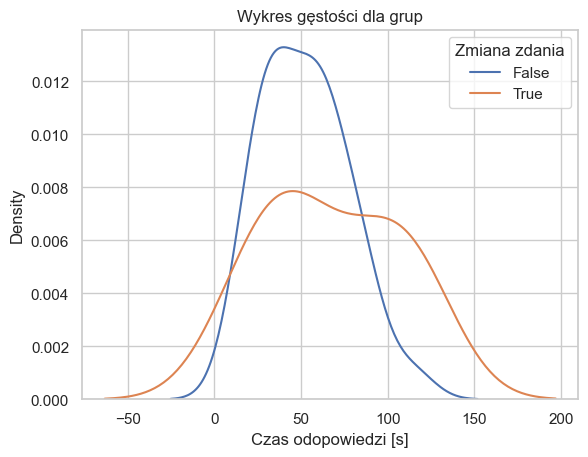

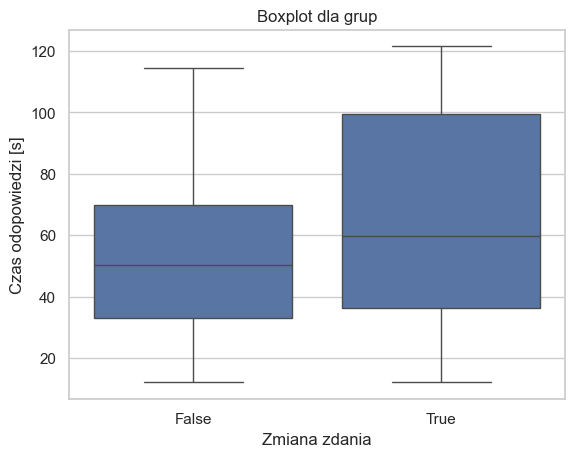

----------------
quest2
Conducting normality test...
Conducting homogeneity variance test...
T-Student test conducted...
T-statistic: 0.9634917004751389
p-value: 0.3413924625913264
No reason to reject H0, accept H0.


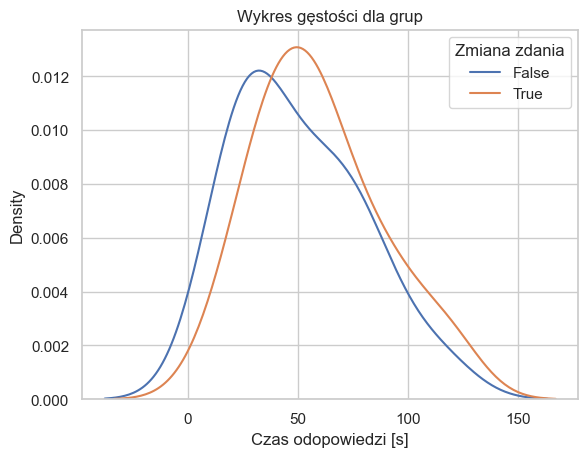

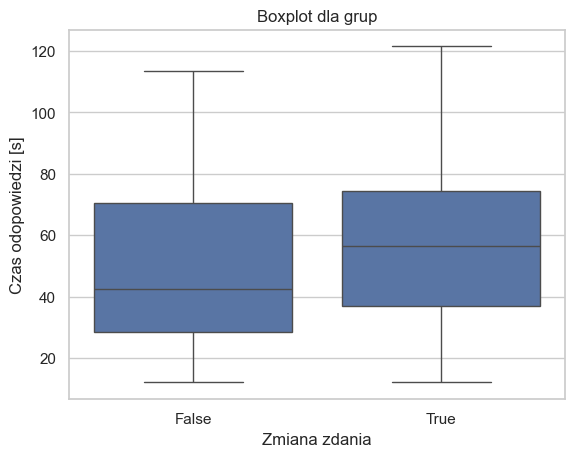

In [13]:
print('2b:')
df = prepare_set_changes_questions([df_merge[f'{c}_2b']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

3a:
----------------
quest1
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 83.0
p-value: 0.06971159555850104
No reason to reject H0, accept H0.


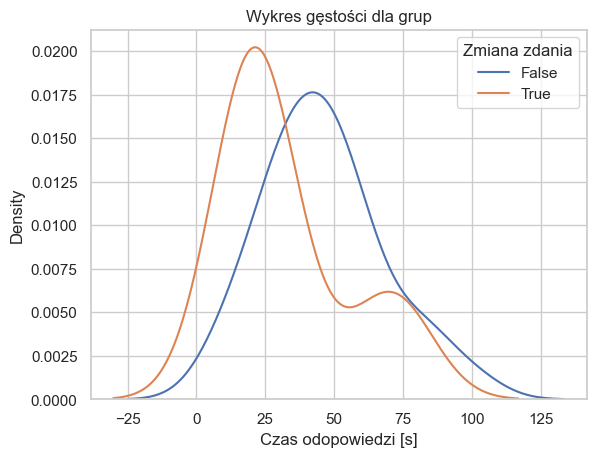

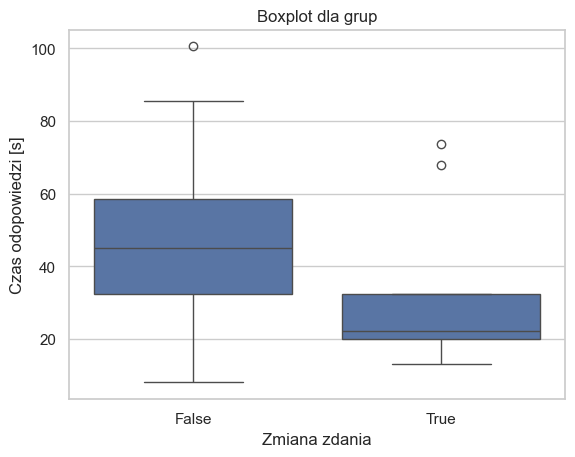

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 234.0
p-value: 0.2519080940857671
No reason to reject H0, accept H0.


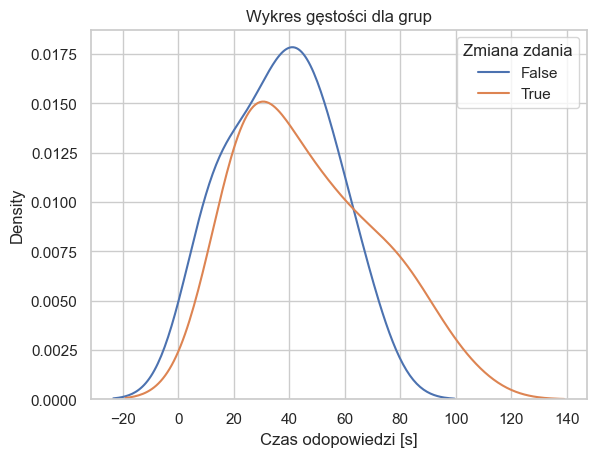

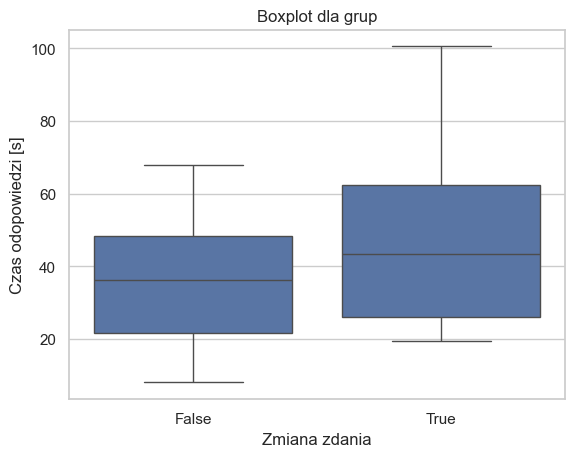

In [14]:
print('3a:')
df = prepare_set_changes_questions([df_merge[f'{c}_3a']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

3b:
----------------
quest1
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 119.0
p-value: 0.5171085104299077
No reason to reject H0, accept H0.


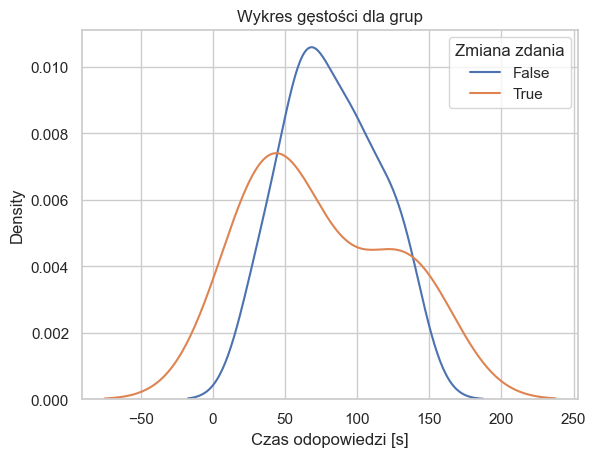

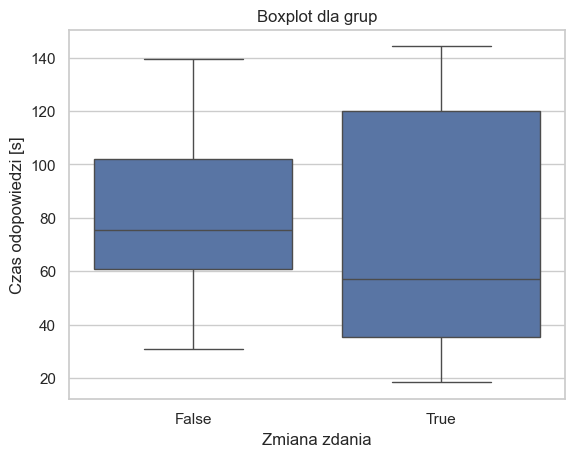

----------------
quest2
Conducting normality test...
Conducting homogeneity variance test...
T-Student test conducted...
T-statistic: 0.3346479055733692
p-value: 0.7397308865606167
No reason to reject H0, accept H0.


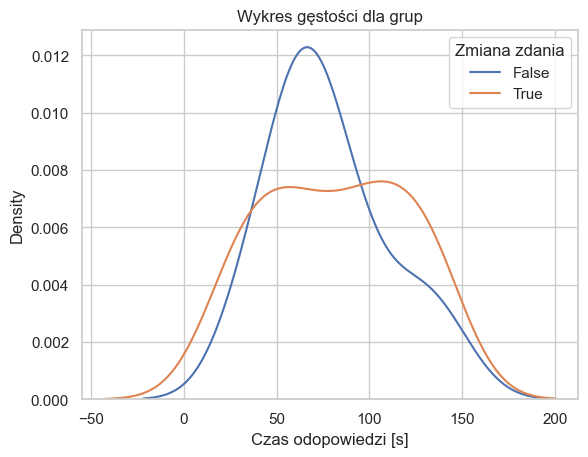

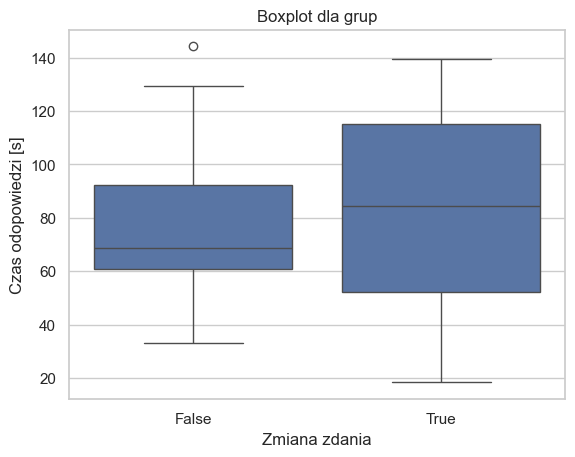

In [15]:
print('3b:')
df = prepare_set_changes_questions([df_merge[f'{c}_3b']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

### Summary:

There is no statistically significant relationship between response time and changing opinion in question 1/2.